<a href="https://colab.research.google.com/github/jacquesbilombe/CRM-Customers-Churn/blob/main/ChurnScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset for this project can be found on the project's GitHub repository or at [Kaggle](https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers/data). This project serves as a case study for the Data Science and Analytics course at PUC RIO. For more information, please refer to the project README.

In [1]:
import os
import csv
import random
import warnings
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from collections import Counter
from sklearn import preprocessing

## Other configurations

In [20]:
%matplotlib inline
warnings.filterwarnings('ignore')

# Clone the project's repository to get the data access
! git clone https://github.com/jacquesbilombe/CRM-Customers-Churn.git

# Set the csv format
pd.options.display.float_format = '{:.2f}'.format

# Set the Graphic hexdecimal color
colors = ['#E94B5C','#87CEEB']

fatal: destination path 'CRM-Customers-Churn' already exists and is not an empty directory.


## Data Exploration

In [4]:
# Files path
data_folder = os.path.join('CRM-Customers-Churn', 'dataset')
DT = pd.read_csv(data_folder + '/' + 'churn.csv').drop(['RowNumber'],axis=1)
# Make a copy of the original Dataset
df = DT.copy(deep = True)
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# Get a general view of all statistic metrics of the dataset
def summary_data(df, head=5):
    func = {
        "Info": df.info(),
        "Shape": df.shape,
        "Mode": df.mode(numeric_only=True),
        # Only for numeric columns
        "Median": df.median(numeric_only=True),
        "Describe": df.describe().T
    }

    for n, f in func.items():
        print("\n################### ", n, " ###################\n")
        if isinstance(f, pd.DataFrame) or isinstance(f, pd.Series):
            print(f)
        else:
            print(f)

summary_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB

###################  Info  ###################

None

###################  Shape  ###################

(10000, 13)

################### 

- It seems that the dataset doesn't have null value
- For the Churn Score problem, the main issue is to know if the customer has exited or not. With standard deviation of `0.4` might suggest that customer churn is a relatively common occurrence in your dataset. However, further analysis is needed to understand the underlying reasons for churn and identify potential areas for improvement.

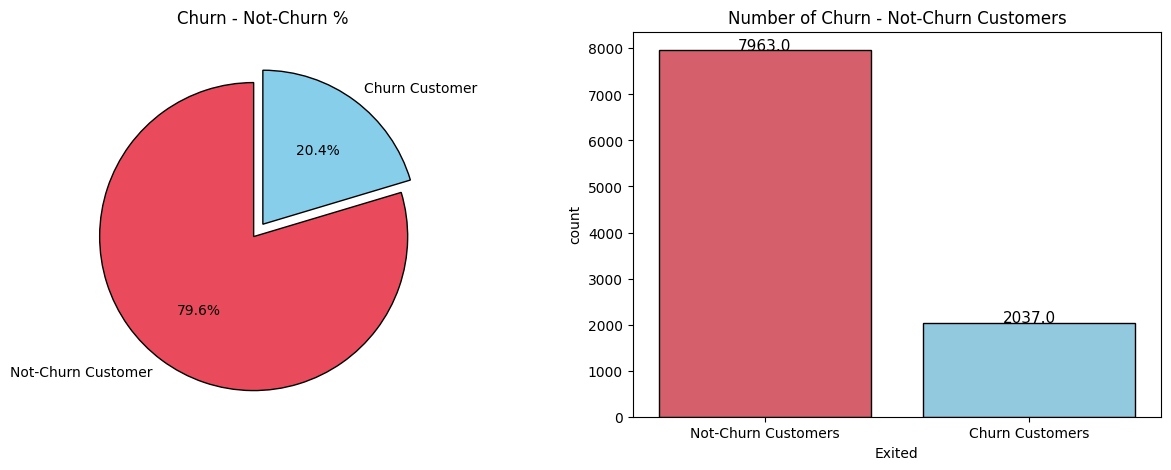

In [22]:
# Get the value counts of the 'Exited' column from the DataFrame and convert to a list
l = list(df['Exited'].value_counts())

# Calculate the percentage of Not-Churn and Churn customers
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

# Create a pie plot
fig = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# First subplot: Pie chart showing the percentage of Not-Churn and Churn customers
plt.subplot(1, 2, 1)
plt.pie(circle,
        labels=['Not-Churn Customer', 'Churn Customer'],
        autopct='%1.1f%%',           # Show percentage on the pie chart
        startangle=90,               # Start the pie chart at a 90-degree angle
        explode=(0.1, 0),            # "explode" the first slice (Not-Churn Customer)
        colors=colors,               # Use the predefined colors
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})  # Style the wedges

# Set title for the pie chart
plt.title('Churn - Not-Churn %');

# Second subplot: Count plot showing the number of Not-Churn and Churn customers
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Exited', data=df, palette=colors, edgecolor='black')

# Annotate each bar with the count value
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2,
            rect.get_height(), horizontalalignment='center', fontsize=11)

# Set x-axis labels for the count plot
ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])

# Set title for the count plot
plt.title('Number of Churn - Not-Churn Customers');

# Display the plots
plt.show()
